In [1]:
import gym
import numpy as np
from ddpg_agent import Agent
import time
import matplotlib.pyplot as plt

In [2]:
if __name__ =="__main__":
    env = gym.make("Pendulum-v0")
    agent = Agent(n_actions=env.action_space.shape[0], alpha=0.001, beta=0.002,
                  env=env, gamma=0.99, mem_size=50000, tau=0.005, fc1_dims=400, fc2_dims=300, 
                  batch_size=64, noise=0.1, chkpt_dir='models/')
    n_games = 501

    best_score = env.reward_range[0]
    score_history = []
    load_checkpoint = False

    if load_checkpoint:
        agent.load_models()
        evaluate = True
    else:
        evaluate = False

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation, evaluate)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.store_transition(observation, action, reward,
                                   observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_

        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
        
        if 300 <= i and score_history[-2] < score_history[-1]:
            agent.save_models()

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))



episode 0 score -1012.3 avg score -1012.3
episode 1 score -1063.5 avg score -1037.9
episode 2 score -1694.9 avg score -1256.9
episode 3 score -1547.6 avg score -1329.6
episode 4 score -1552.1 avg score -1374.1
episode 5 score -1272.5 avg score -1357.1
episode 6 score -1121.1 avg score -1323.4
episode 7 score -1291.4 avg score -1319.4
episode 8 score -1123.1 avg score -1297.6
episode 9 score -1257.7 avg score -1293.6
episode 10 score -984.4 avg score -1265.5
episode 11 score -983.0 avg score -1242.0
episode 12 score -759.5 avg score -1204.8
episode 13 score -756.3 avg score -1172.8
episode 14 score -842.5 avg score -1150.8
episode 15 score -630.3 avg score -1118.3
episode 16 score -1002.9 avg score -1111.5
episode 17 score -992.5 avg score -1104.9
episode 18 score -630.5 avg score -1079.9
episode 19 score -631.4 avg score -1057.5
episode 20 score -504.3 avg score -1031.1
episode 21 score -253.1 avg score -995.8
episode 22 score -126.0 avg score -957.9
episode 23 score -244.9 avg score -

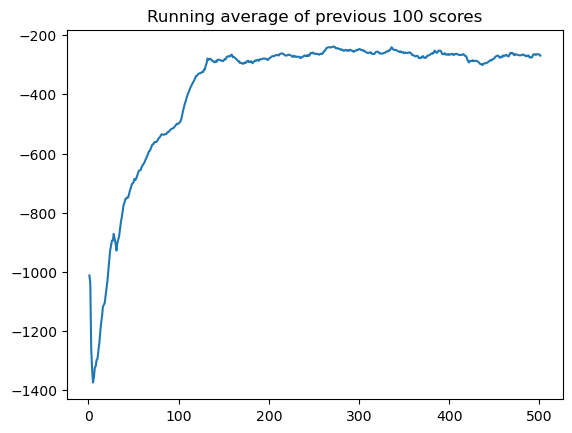

In [3]:
def plot_learning_curve(x, scores):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

x = [i+1 for i in range(n_games)]
plot_learning_curve(x, score_history)

In [6]:
scores = []
agent.load_models() 
evaluate = True

for i in range(100):
    obs = env.reset()
    actions = []
    score = 0
    while True:
        action = agent.choose_action(obs, evaluate)
        obs, reward, done, info = env.step(action)
        score += reward
        actions.append(action)

        if done:
            print(f"Done, points: {score}")
            break
    
    scores.append(score)
    
    env.close()

... loading models ...
Done, points: -124.51479568342437
Done, points: -476.22542574588
Done, points: -128.13307042405557
Done, points: -121.98431800503924
Done, points: -603.4065370823988
Done, points: -123.68973278759006
Done, points: -485.80001266591404
Done, points: -355.0327474787803
Done, points: -120.73119606228734
Done, points: -245.16573644069175
Done, points: -120.74422508998937
Done, points: -473.64266001222234
Done, points: -126.21659850362107
Done, points: -122.04003756795376
Done, points: -123.24427791138874
Done, points: -236.7935748499882
Done, points: -482.0835251919547
Done, points: -234.43716148151896
Done, points: -237.0203017084616
Done, points: -126.30692519018773
Done, points: -123.79613579327278
Done, points: -124.51541317773997
Done, points: -606.9331451747466
Done, points: -125.5039279024751
Done, points: -476.84029105165143
Done, points: -0.5295332249300247
Done, points: -125.20936819053696
Done, points: -468.8135695632518
Done, points: -124.06659505548316
Do

In [7]:
np.mean(scores)

-257.8918795026905